In [89]:
%matplotlib inline

import os
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

CRF_SAMPLES = '../data/proposals/crf-test.props'
RNNG_SAMPLES = '../data/proposals/rnng-test.props'
DYER_SAMPLES = '../data/proposals/dyer-test.props'

ENTROPIES_OUT = '../out/entropies'

In [90]:
def nll_dict_from_samples(path):
    nlls = defaultdict(list)
    with open(path) as f:
        for line in f:
            index, nll, _ = line.strip().split(' ||| ')
            nlls[int(index)].append(float(nll))
    return nlls

def read_nll_from_samples(path):
    with open(path) as f:
        nlls = [float(line.strip().split(' ||| ')[1]) for line in f]
    return nlls

## Print entropies

In [91]:
crf_dict = nll_dict_from_samples(CRF_SAMPLES)
dyer_dict = nll_dict_from_samples(DYER_SAMPLES)
rnng_dict = nll_dict_from_samples(RNNG_SAMPLES)

In [92]:
def write_entropies(nlls_dict, path):
    with open(path, 'w') as f:
        for i, nlls in nlls_dict.items():
            entropy = -np.mean(nlls)
            print(i, entropy, file=f)

In [19]:
write_entropies(crf_dict, os.path.join(ENTROPIES_OUT, 'crf_entropies_approx.txt'))
write_entropies(dyer_dict, os.path.join(ENTROPIES_OUT, 'dyer_entropies_approx.txt'))
write_entropies(rnng_dict, os.path.join(ENTROPIES_OUT, 'rnng_entropies_approx.txt'))

## Entropies

In [28]:
rnng_nll = read_nll_from_samples(RNNG_SAMPLES)
crf_nll = read_nll_from_samples(CRF_SAMPLES)
dyer_nll = read_nll_from_samples(DYER_SAMPLES)

In [36]:
- np.mean(rnng_nll)

3.3100958276791683

In [37]:
- np.mean(crf_nll)

4.185762098625006

In [38]:
- np.mean(dyer_nll)

1.916661471623733

## Variance

In [32]:
np.var(dyer_nll)

10.319010052216576

In [33]:
np.var(rnng_nll)

19.156451063835185

In [34]:
np.var(crf_nll)

20.81806457250536

# All entropies

In [45]:
def write_entropy_tsv(nll_dicts, results_path, model, temp):
    with open(results_path, 'w') as f:
        print('model', 'seed', 'entropy', 'num-samples', 'temp', sep='\t', file=f)
        for seed, nll_dict in enumerate(nll_dicts, 1):
            for num_samples in (1, 5, 10, 25, 50, 75, 100):
                entropy = np.mean(
                    [-np.mean(samples[:num_samples]) for _, samples in nll_dict.items()])
                print(model, seed, entropy, num_samples, temp, sep='\t', file=f)

### DiscRNNG 0.8

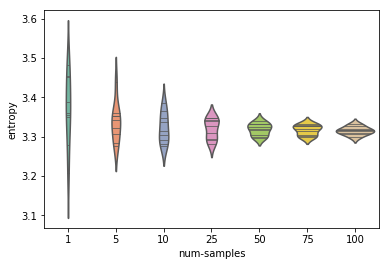

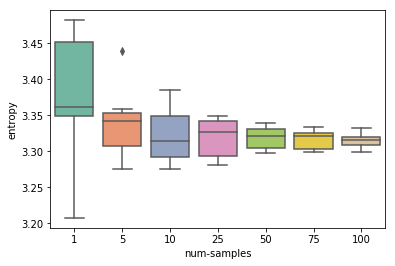

In [63]:
disc08_results_path = '../out/sample-experiment/proposal=disc-rnng_temp=0.8_entropies.tsv'

name = '../out/sample-experiment/proposal=disc-rnng_temp=0.8_seed={}.props'
dicts = [nll_dict_from_samples(name.format(seed)) for seed in range(1, 10)]
write_entropy_tsv(dicts, disc08_results_path, model='disc-rnng', temp=0.8)

df = pd.read_csv(disc08_results_path, sep='\t')

fig, ax = plt.subplots()
sns.violinplot(data=df, x='num-samples', y='entropy', inner='sticks', palette='Set2')
plt.savefig('figures/entropy/disc_0.8.pdf')

fig, ax = plt.subplots()
sns.boxplot(data=df, x='num-samples', y='entropy', palette='Set2')
plt.savefig('figures/entropy/disc_0.8_box.pdf')

### DiscRNNG 1.0

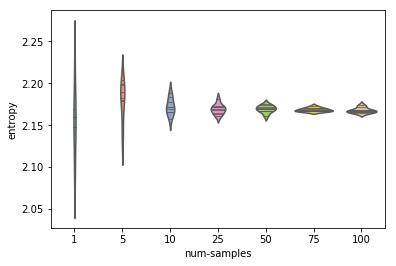

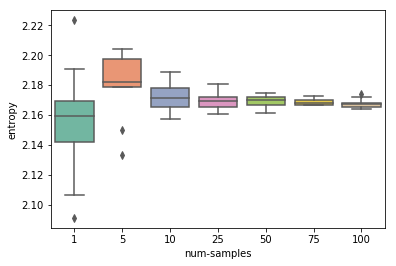

In [62]:
disc1_results_path = '../out/sample-experiment/proposal=disc-rnng_temp=1.0_entropies.tsv'

name = '../out/sample-experiment/proposal=disc-rnng_temp=1.0_seed={}.props'
dicts = [nll_dict_from_samples(name.format(seed)) for seed in range(1, 10)]
write_entropy_tsv(dicts, disc1_results_path, model='disc-rnng', temp=1.0)

df = pd.read_csv(disc1_results_path, sep='\t')

fig, ax = plt.subplots()
sns.violinplot(data=df, x='num-samples', y='entropy', inner='sticks', palette='Set2')
plt.savefig('figures/entropy/disc_1.pdf')

fig, ax = plt.subplots()
sns.boxplot(data=df, x='num-samples', y='entropy', palette='Set2')
plt.savefig('figures/entropy/disc_1_box.pdf')

## CRF

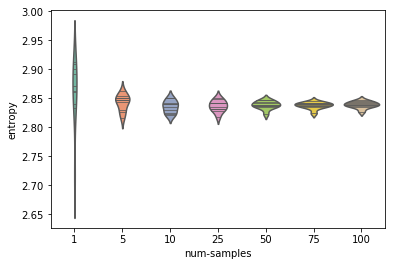

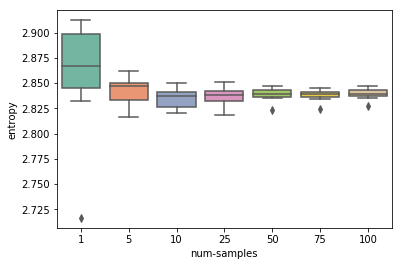

In [70]:
crf_results_path = '../out/sample-experiment/proposal=crf_entropies.tsv'

name = '../out/sample-experiment/proposal=crf_seed={}.props'
dicts = [nll_dict_from_samples(name.format(seed)) for seed in range(1, 11)]
write_entropy_tsv(dicts, results_path, model='crf', temp=1.0)

df = pd.read_csv(crf_results_path, sep='\t')

fig, ax = plt.subplots()
sns.violinplot(data=df, x='num-samples', y='entropy', inner='sticks', palette='Set2')
plt.savefig('figures/entropy/crf.pdf')

fig, ax = plt.subplots()
sns.boxplot(data=df, x='num-samples', y='entropy', palette='Set2')
plt.savefig('figures/entropy/crf_box.pdf')

## Together

In [68]:
rnng_df = pd.concat([
    pd.read_csv(disc08_results_path, sep='\t'),
    pd.read_csv(disc1_results_path, sep='\t'),
])

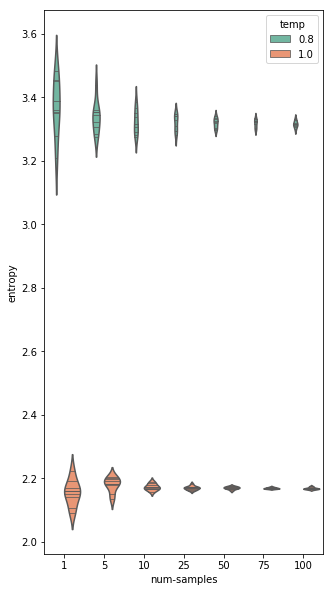

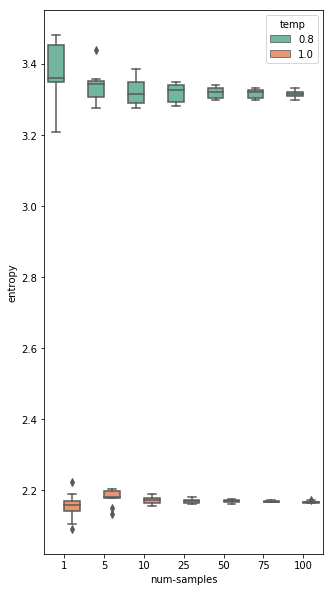

In [86]:
fig, ax = plt.subplots(figsize=(5,10))
sns.violinplot(data=rnng_df, x='num-samples', y='entropy', inner='sticks', palette='Set2', hue='temp')
plt.savefig('figures/entropy/rnng_temps.pdf')

fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=rnng_df, x='num-samples', y='entropy', palette='Set2', hue='temp')
plt.savefig('figures/entropy/box_rnng_temps.pdf')

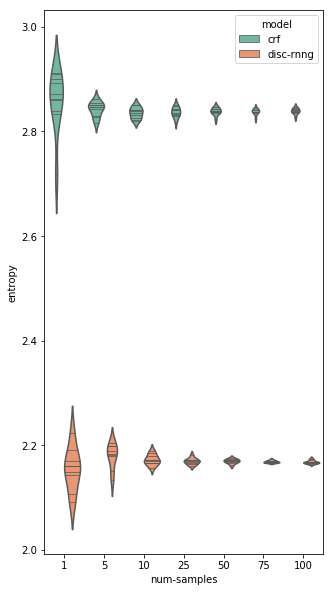

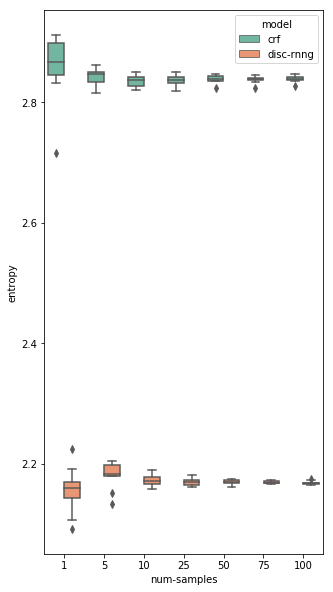

In [87]:
mix_df = pd.concat([
    pd.read_csv(crf_results_path, sep='\t'),
    pd.read_csv(disc1_results_path, sep='\t'),
])

fig, ax = plt.subplots(figsize=(5,10))
sns.violinplot(data=mix_df, x='num-samples', y='entropy', inner='sticks', palette='Set2', hue='model')
plt.savefig('figures/entropy/crf_rnng1.pdf')

fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=mix_df, x='num-samples', y='entropy', palette='Set2', hue='model')
plt.savefig('figures/entropy/box_crf_rnng1.pdf')

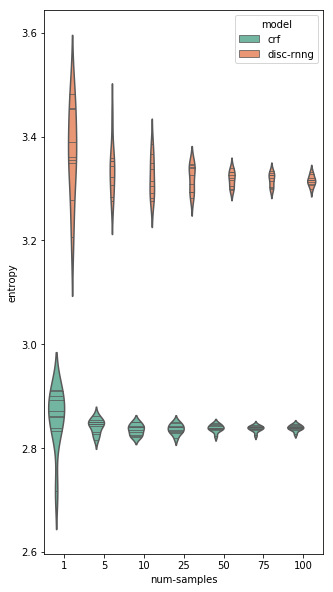

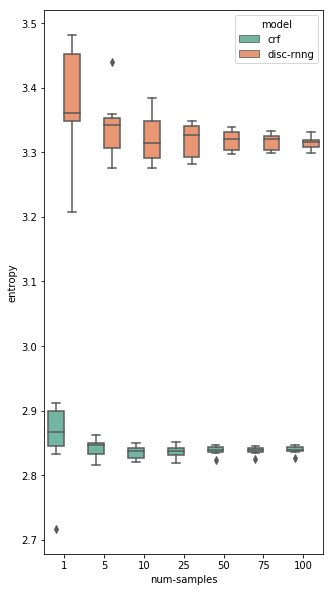

In [88]:
mix_df = pd.concat([
    pd.read_csv(crf_results_path, sep='\t'),
    pd.read_csv(disc08_results_path, sep='\t'),
])

fig, ax = plt.subplots(figsize=(5,10))
sns.violinplot(data=mix_df, x='num-samples', y='entropy', inner='sticks', palette='Set2', hue='model')
plt.savefig('figures/entropy/crf_rnng08.pdf')

fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=mix_df, x='num-samples', y='entropy', palette='Set2', hue='model')
plt.savefig('figures/entropy/box_crf_rnng08.pdf')

In [98]:
crf_pd = pd.read_csv(crf_results_path, sep='\t')
rnng10_pd = pd.read_csv(disc1_results_path, sep='\t')
rnng08_pd = pd.read_csv(disc08_results_path, sep='\t')

rnng10_pd['model'] = 'disc-rnng 1.0'
rnng08_pd['model'] = 'disc-rnng 0.8'

all_df = pd.concat([
    crf_pd,
    rnng10_pd,
    rnng08_pd  
])

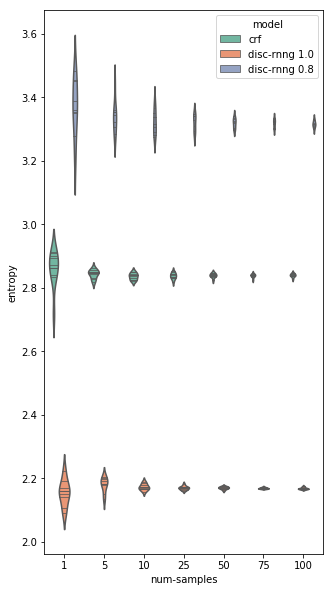

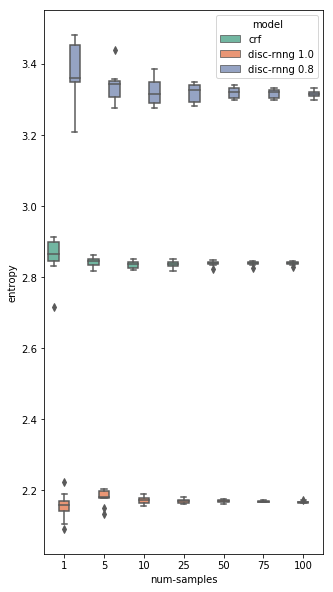

In [104]:
fig, ax = plt.subplots(figsize=(5,10))
sns.violinplot(data=all_df, x='num-samples', y='entropy', inner='sticks', palette='Set2', hue='model')
plt.savefig('figures/entropy/all.pdf')

fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=all_df, x='num-samples', y='entropy', palette='Set2', hue='model')
plt.savefig('figures/entropy/box_all.pdf')